In [38]:
import os
from tensorflow.keras.preprocessing.image import load_img

In [39]:
# Load Images
DATASET_RAW_PATH = os.path.join("Dataset", "Dataset Raw")

images = []
class_images = {}
class_names = {}

for idx, label in enumerate(os.listdir(DATASET_RAW_PATH)):
    for filename in os.listdir(os.path.join(DATASET_RAW_PATH, label)):
        image_path = os.path.join(DATASET_RAW_PATH, label, filename)

        # Load images with no target size and further preprocessing for actual exploration to the data for the raw images (true images)
        image = load_img(image_path, color_mode="rgb")

        images.append(image)
        if idx not in class_images:
            class_images[idx] = []
        class_images[idx].append(image)

    class_names[idx] = label

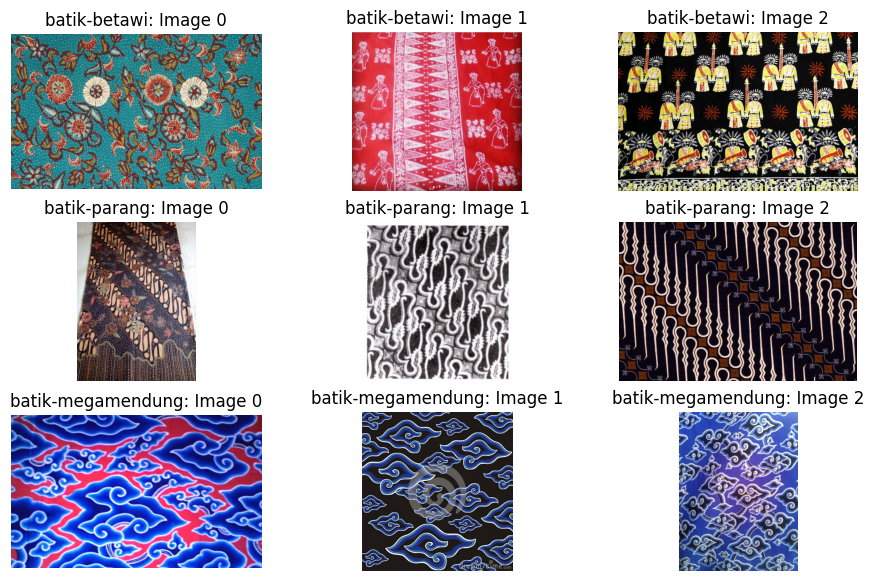

In [43]:
# Load Sample image for each classes
from matplotlib import pyplot as plt

plt.figure(figsize=(11, 7))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(class_images[i//3][i%3])
    plt.axis('off')
    plt.title(f"{class_names[i//3]}: Image {i%3}")

plt.show()

Image batik-betawi count: 50
Image batik-parang count: 50
Image batik-megamendung count: 46


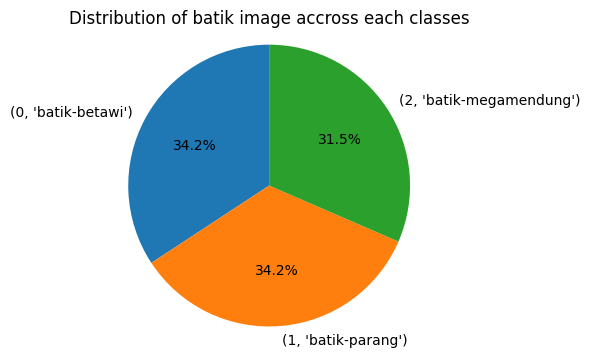

In [41]:
class_counts = []

# View distribution of images of each class
for i in class_images:
    print(f"Image {class_names[i]} count: {len(class_images[i])}")
    class_counts.append(len(class_images[i]))

# We can see that the dataset consists of approximately 50 images for each batik
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=class_names.items(), autopct="%1.1f%%", startangle=90)
plt.title("Distribution of batik image accross each classes")
plt.axis('equal')
plt.show()

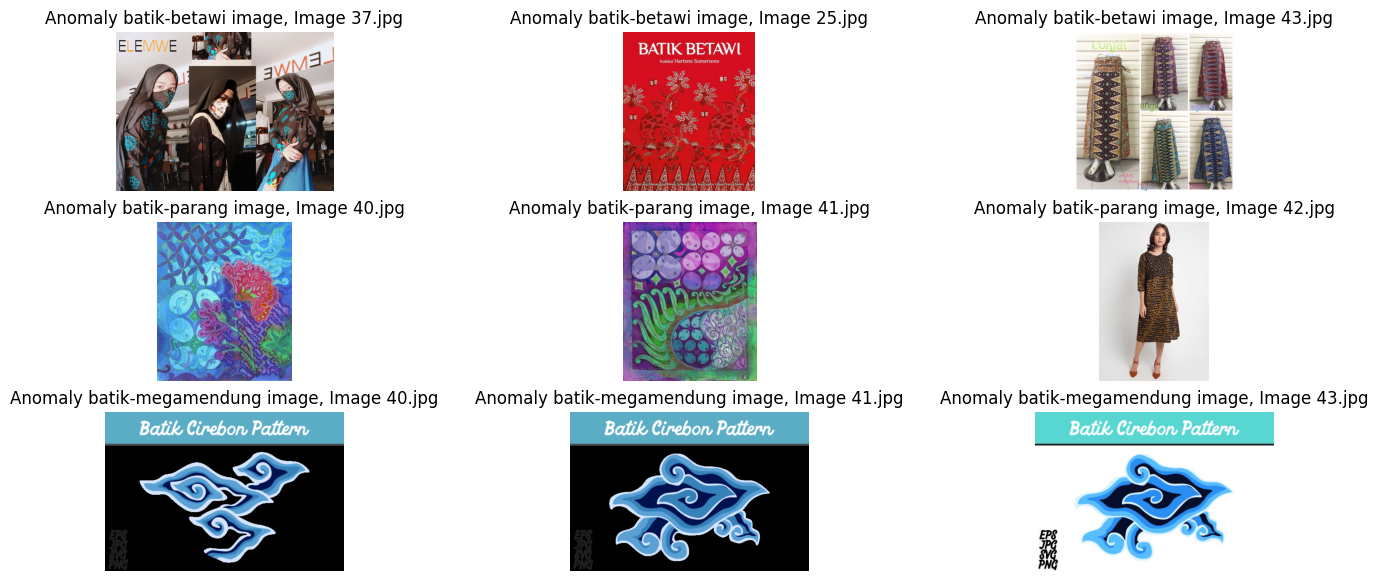

In [42]:
# Upon further inspection from the raw image, there are some images that are not cleaned 
# and this data can create misunderstanding in our model
# This uncleaned anomalous images, can contains text, or focuses on the model, etc. This can distract model from the main classifying task

# We can call this "anomalous images"

# TODO: Add 3 sample images from each classes here 
anomalous_image_dict = {
    "batik-betawi": ["37.jpg", "25.jpg", "43.jpg"],
    "batik-parang": ["40.jpg", "41.jpg", "42.jpg"],
    "batik-megamendung": ["40.jpg", "41.jpg", "43.jpg"]
}
anomalous_images = []
anomalous_images_description = []

for label in anomalous_image_dict:
    for filename in anomalous_image_dict[label]:
        image_path = os.path.join("Dataset", "Dataset Raw", label, filename)
        image = load_img(image_path, color_mode="rgb")
        anomalous_images.append(image)
        anomalous_images_description.append(f"Anomaly {label} image, Image {filename}")

plt.figure(figsize=(17, 7))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(anomalous_images[i])
    plt.axis('off')
    plt.title(anomalous_images_description[i])

plt.show()

Considering our limited dataset (with only 50 images), we decided this distracting anomaly will create unnecessary noise in the model. We will remove it from the dataset through manual supervision!

Removal can be done by simply deleting the image from the dataset or zooming in on the image and cropping out the anomaly.